# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

It is important to consider the method we will be defining as the "best location" as applied in this scenario. Since we really want to minimize the overall distance that the driver will have to travel, I think the best approach would be to use the average of all of the points in each cluster. This way, when we drive to any of the locations in the delivery area, we can overtime average out the distance travelled.

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file `pizza_delivery_locations.csv` is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. 

In [39]:
data_file = "pizza_delivery_locations.csv"

In [40]:
data = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can implement your own clustering algorithm. What distance metric is the most appropriate for this situation?

The most applicable distance metric is Euclidean distance due to the fact that we can represent longitude and latitude as points, measured in space. While the earth is not flat like a 2-D array, this will be the best approach for us.

In [41]:
# Method to calculate Euclidean Distance between 2 points
def euclidean(co1, co2):
    distance = 0
    for c1, c2 in zip(co1, co2):
        # Distance = (c1-c2)^2
        distance += (c1 - c2) ** 2
    return sqrt(distance)

def kcluster(rows, k=K, distance=euclidean):
    # Determine the minimum and maximum values for each point
    ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows]))
    for i in range(len(rows[0]))]

    # Create k randomly placed centroids
    clusters=[[random.random()*(ranges[i][1]-ranges[i][0])+ranges[i][0]
                            for i in range(len(rows[0]))] for j in range(k)]
  
    lastmatches=None
    bestmatches = None

    for t in range(100):
        print(f'Iteration {t}')
        bestmatches = [[] for _ in range(k)]

        # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row = rows[j]
            bestmatch = 0
            for i in range(k):
                d = distance(clusters[i], row)
                if d < distance(clusters[bestmatch], row):
                    bestmatch = i
            bestmatches[bestmatch].append(row)

        # Convert lists to strings
        bestmatch_str = str(bestmatches)
        lastmatch_str = str(lastmatches)

        # Compare the strings
        if bestmatch_str == lastmatch_str: break
        lastmatches = bestmatches.copy()
        
        # Move the centroids to the average of the cluster members
        for i in range(k):
            if len(bestmatches[i]) > 0:
                avg_lat = sum(row[0] for row in bestmatches[i]) / len(bestmatches[i])
                avg_long = sum(row[1] for row in bestmatches[i]) / len(bestmatches[i])
                clusters[i] = [avg_lat, avg_long]

    return bestmatches

In [42]:
K = 3
coordinates = data[:, [0, 1]]
clusters3 = kcluster(coordinates, distance=euclidean, k=K)


K = 4
clusters4 = kcluster(coordinates, distance=euclidean, k=K)

K = 5
clusters5 = kcluster(coordinates, distance=euclidean, k=K)


Iteration 0
Iteration 1
Iteration 2
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 0
Iteration 1
Iteration 2
Iteration 3


In [43]:
def avg_coordinates(cluster):
    if len(cluster) == 0:
        return None, None # Return None if the cluster is empty
    total_lat = sum(coordinate[0] for coordinate in cluster)
    total_long = sum(coordinate[1] for coordinate in cluster)
    avg_lat = total_lat / len(cluster)
    avg_long = total_long / len(cluster)
    return avg_lat, avg_long

avg_clusters3 = []
avg_clusters4 = []
avg_clusters5 = []

for cluster in clusters3:
    avg_lat, avg_long = avg_coordinates(cluster)
    avg_clusters3.append((avg_lat, avg_long))
    
for cluster in clusters4:
    avg_lat, avg_long = avg_coordinates(cluster)
    avg_clusters4.append((avg_lat, avg_long))
    
for cluster in clusters5:
    avg_lat, avg_long = avg_coordinates(cluster)
    avg_clusters5.append((avg_lat, avg_long))



## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

## Scatter Plot of Original Data

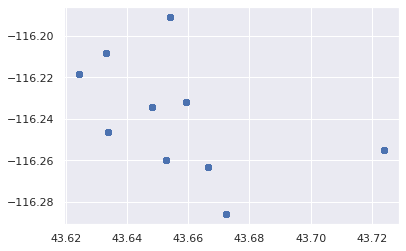

In [44]:
plt.scatter(data[:,0], data[:,1])

## Scatter Plot of 3 Clusters

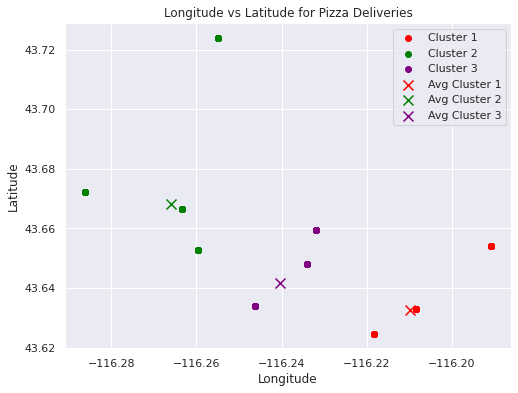

In [45]:
colors = ['red', 'green', 'purple'] 

plt.figure(figsize=(8, 6))

# Plot data points for each cluster
for i, cluster in enumerate(clusters3):
    cluster = np.array(cluster)  # Convert list of arrays to a numpy array
    plt.scatter(cluster[:, 1], cluster[:, 0], color=colors[i], label=f'Cluster {i+1}')

# Plot average values for each cluster
for i, avg_cluster in enumerate(avg_clusters3):
    plt.scatter(avg_cluster[1], avg_cluster[0], color=colors[i], marker='x', s=100, label=f'Avg Cluster {i+1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs Latitude for Pizza Deliveries')
plt.legend()
plt.grid(True)
plt.show()

## Scatter Plot of 4 Clusters

In [ ]:
colors = ['red', 'green', 'purple', 'blue']
plt.figure(figsize=(8, 6))

# Plot data points for each cluster
for i, cluster in enumerate(clusters4):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 1], cluster[:, 0], color=colors[i], label=f'Cluster {i+1}')

# Plot average values for each cluster
for i, avg_cluster in enumerate(avg_clusters4):
    plt.scatter(avg_cluster[1], avg_cluster[0], color=colors[i], marker='x', s=100, label=f'Avg Cluster {i+1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs Latitude for Pizza Deliveries')
plt.legend()
plt.grid(True)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Scatter Plot of 5 Clusters

In [ ]:
colors = ['red', 'green', 'purple', 'blue', 'pink'] 

plt.figure(figsize=(8, 6))

# Plot data points for each cluster
for i, cluster in enumerate(clusters5):
    if len(cluster) > 0:  # Check if the cluster is not empty
        cluster = np.array(cluster)  # Convert list of arrays to a numpy array
        if len(cluster.shape) == 1:
            cluster = np.array([cluster])  # Convert 1D array to 2D array
        plt.scatter(cluster[:, 1], cluster[:, 0], color=colors[i % len(colors)], label=f'Cluster {i+1}')

# Plot average values for each cluster
for i, avg_cluster in enumerate(avg_clusters5):
    plt.scatter(avg_cluster[1], avg_cluster[0], color=colors[i % len(colors)], marker='x', s=100, label=f'Avg Cluster {i+1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs Latitude for Pizza Deliveries')
plt.legend()
plt.grid(True)
plt.show()



## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

Copyright &copy; 2024 Marina Barsky. All rights reserved.